In [1]:
import numpy as np
import pandas as pd
import scipy

import seaborn as sns

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Method implementation

### PCA (Principal Component Analysis): own implementation
using Singular-Value Decomposition

In [30]:
def principal_compnent_analysis(X, new_dim=1):
    u, d, v = np.linalg.svd(X)
    max_indices = np.argsort(-d)

    w = v[max_indices[:new_dim]]
    if new_dim == 1:
        w = w[0]
    w = w.T
    Z = np.dot(X,w)
    if Z.ndim == 1:
        Z = Z.reshape((Z.shape[0],1))
    return Z, w

### PCA (Principal Component Analysis) from workshop

In [38]:
def PCA_transform(X, n_components):
    '''
    Select components with largest variance:
        1) Estimate covariance matrix
        2) Find its eigenvalues and eigenvectors
        3) Check if eigenvalues are complex -> to real space
        4) Sort vals & vectors
        5) Select n components
        5) Project all data on the selected components  
    '''
    cov = np.dot(X.T, X) / len(X)
    
    e_val, e_vect = np.linalg.eig(cov)
    
    e_val = np.absolute(e_val)
    
    ind = np.argsort(-e_val)
    e_vect = e_vect[:, ind]
    e_vect = e_vect.astype(float)
    
    e_vect_reduced = e_vect[:, :n_components]
    new_X = np.dot(X, e_vect_reduced)
    return new_X, e_vect_reduced

def PCA_restore(X_reduced, evect_reduced, p1, p2):
    '''
    Restore "original" values:
        1) Restore original size
        2) Rescale
    '''
    X_rest = np.dot(X_reduced, evect_reduced.T)
    X_rest = denormalize(X_rest, p1, p2)
    return X_rest

### Auxiliary functions

In [26]:
def visualize_corr(data, target, classification = True):
    df = pd.DataFrame(data, columns = range(1,data.shape[1]+1))
    df['target'] = target
    #df['target'] = df['target'].apply(lambda x: '"1"' if x == 1 else '"0"' if x == 0 else 'class 3')#astype(str)
    if classification:
        sns.pairplot(df, hue = 'target')
    else:
        sns.pairplot(df)
    plt.show()
    print('Correlation matrix')
    print(df.corr())
    return

def normalize(X, mean_std=True):
    '''
    Normalise data before processing
    Return normalized data and normalization parameters
    '''     
    if mean_std:
        means, stds = X.mean(axis=0), X.std(axis=0, ddof=1)
        X = (X - means) / stds
        return X, means, stds
    else:
        mins, maxs = X.min(axis=0), X.max(axis=0)
        X = (X - mins) / (maxs - mins)
        return X, mins, maxs

def denormalize(X, param1, param2, mean_std=True):
    '''
    Denormalize data after processing
    Return denormalized data
    '''
    if mean_std:
        means, stds = param1, param2
        X = X * stds + means
        return X
    else:
        mins, maxs = param1, param2
        X = X * (maxs - mins) + mins
        return X

# Data

### Generate dataset

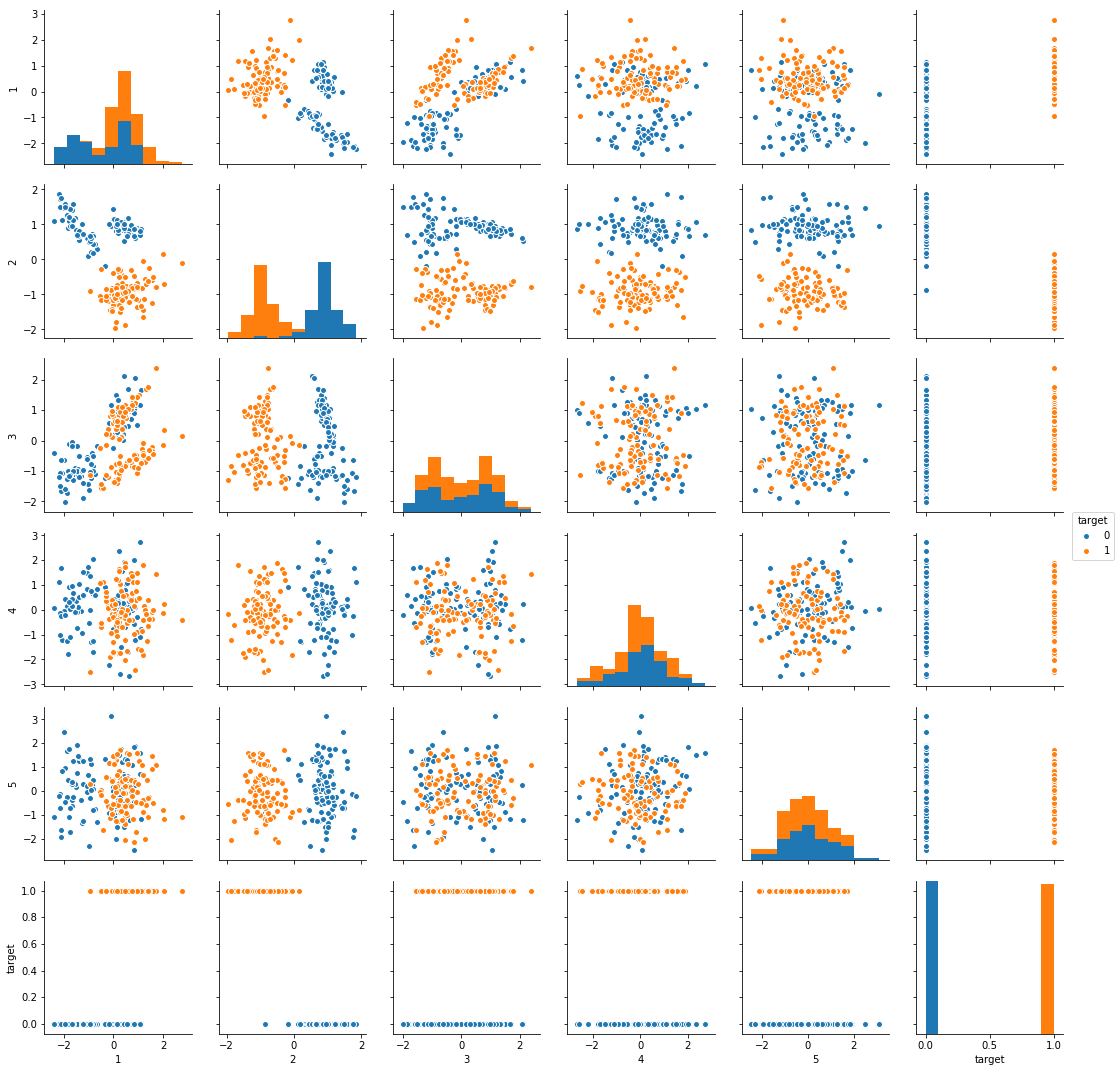

Correlation matrix
               1         2         3         4         5    target
1       1.000000 -0.501715  0.553571 -0.046761 -0.056474  0.510896
2      -0.501715  1.000000 -0.066191  0.117830  0.049182 -0.921422
3       0.553571 -0.066191  1.000000 -0.015088  0.033607  0.034645
4      -0.046761  0.117830 -0.015088  1.000000  0.099547 -0.111410
5      -0.056474  0.049182  0.033607  0.099547  1.000000 -0.077161
target  0.510896 -0.921422  0.034645 -0.111410 -0.077161  1.000000


In [42]:
from sklearn import datasets

sample_size = 200
data, target = datasets.make_classification(n_samples=sample_size, n_features=5, 
                                            n_informative=3, n_redundant=0, 
                                            n_repeated=0, n_classes=2,  
                                            weights=None, flip_y=0.01, 
                                            class_sep=2.0, hypercube=True, 
                                            shift=0.0, scale=1.0, 
                                            shuffle=True, random_state=1)

data, p1, p2 = normalize(data)
visualize_corr(data, target)

### Run processing and visualize

### Own

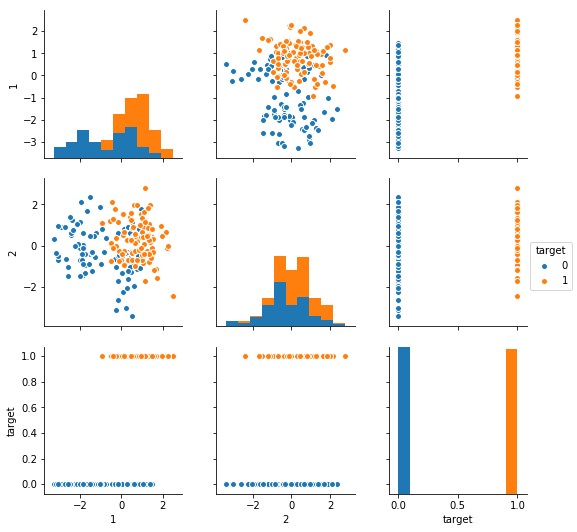

Correlation matrix
                   1             2    target
1       1.000000e+00 -3.757441e-17  0.629818
2      -3.757441e-17  1.000000e+00  0.271532
target  6.298179e-01  2.715318e-01  1.000000


In [44]:
PCA_data, evect_reduced = principal_compnent_analysis(data, 2)
visualize_corr(PCA_data, target)

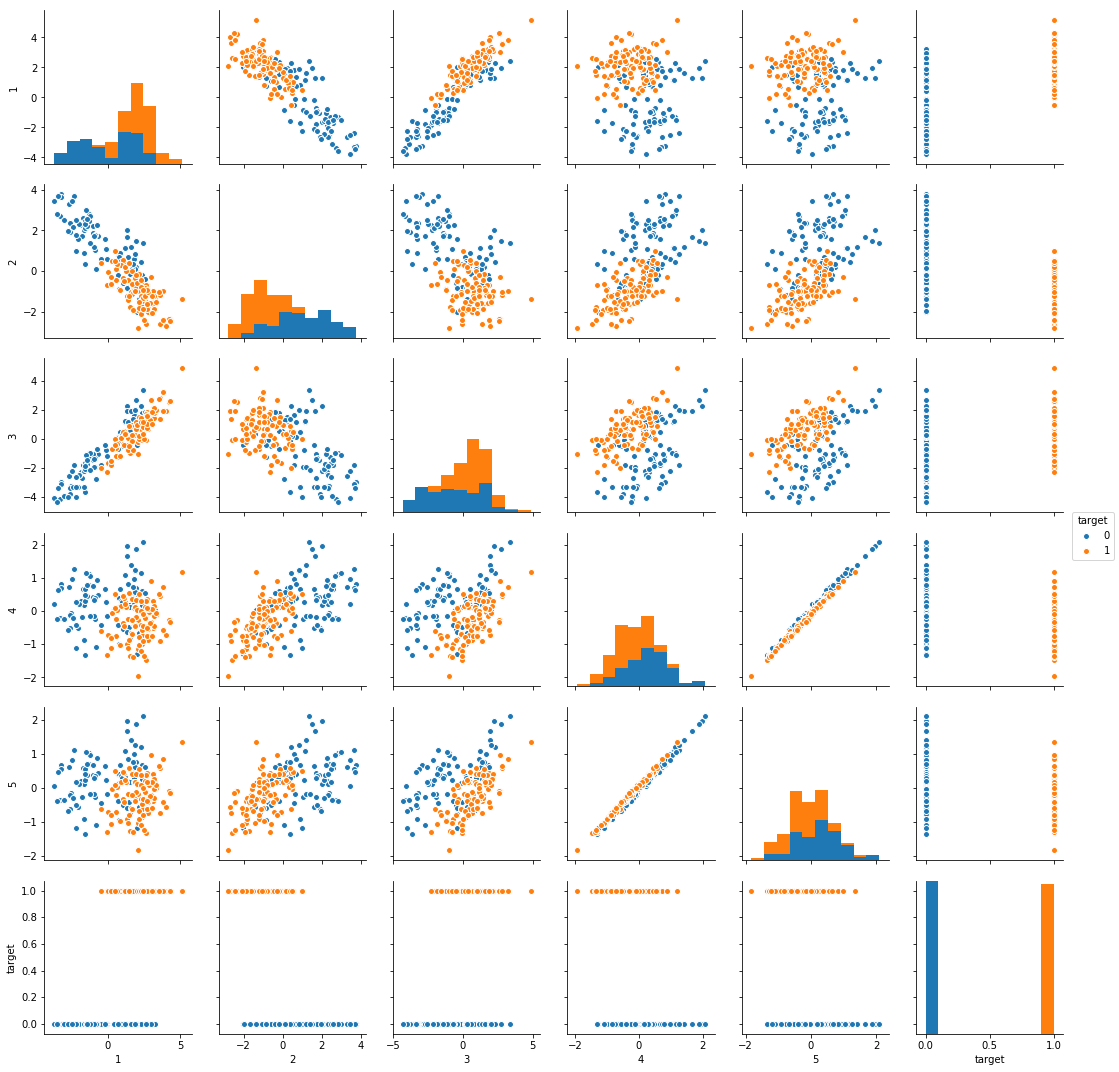

Correlation matrix
               1         2         3         4         5    target
1       1.000000 -0.881056  0.919127 -0.147604 -0.036146  0.595943
2      -0.881056  1.000000 -0.623454  0.597878  0.504550 -0.685641
3       0.919127 -0.623454  1.000000  0.253979  0.360480  0.414002
4      -0.147604  0.597878  0.253979  1.000000  0.993736 -0.423733
5      -0.036146  0.504550  0.360480  0.993736  1.000000 -0.360807
target  0.595943 -0.685641  0.414002 -0.423733 -0.360807  1.000000


In [45]:
restored_PCA_data = PCA_restore(PCA_data, evect_reduced, p1, p2)
visualize_corr(restored_PCA_data, target)

### From workshop

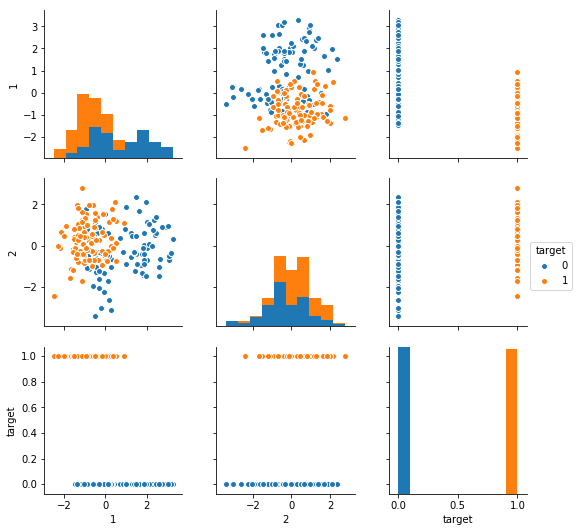

Correlation matrix
                   1             2    target
1       1.000000e+00  2.739801e-16 -0.629818
2       2.739801e-16  1.000000e+00  0.271532
target -6.298179e-01  2.715318e-01  1.000000


In [46]:
PCA_data, evect_reduced = PCA_transform(data, 2)
visualize_corr(PCA_data, target)

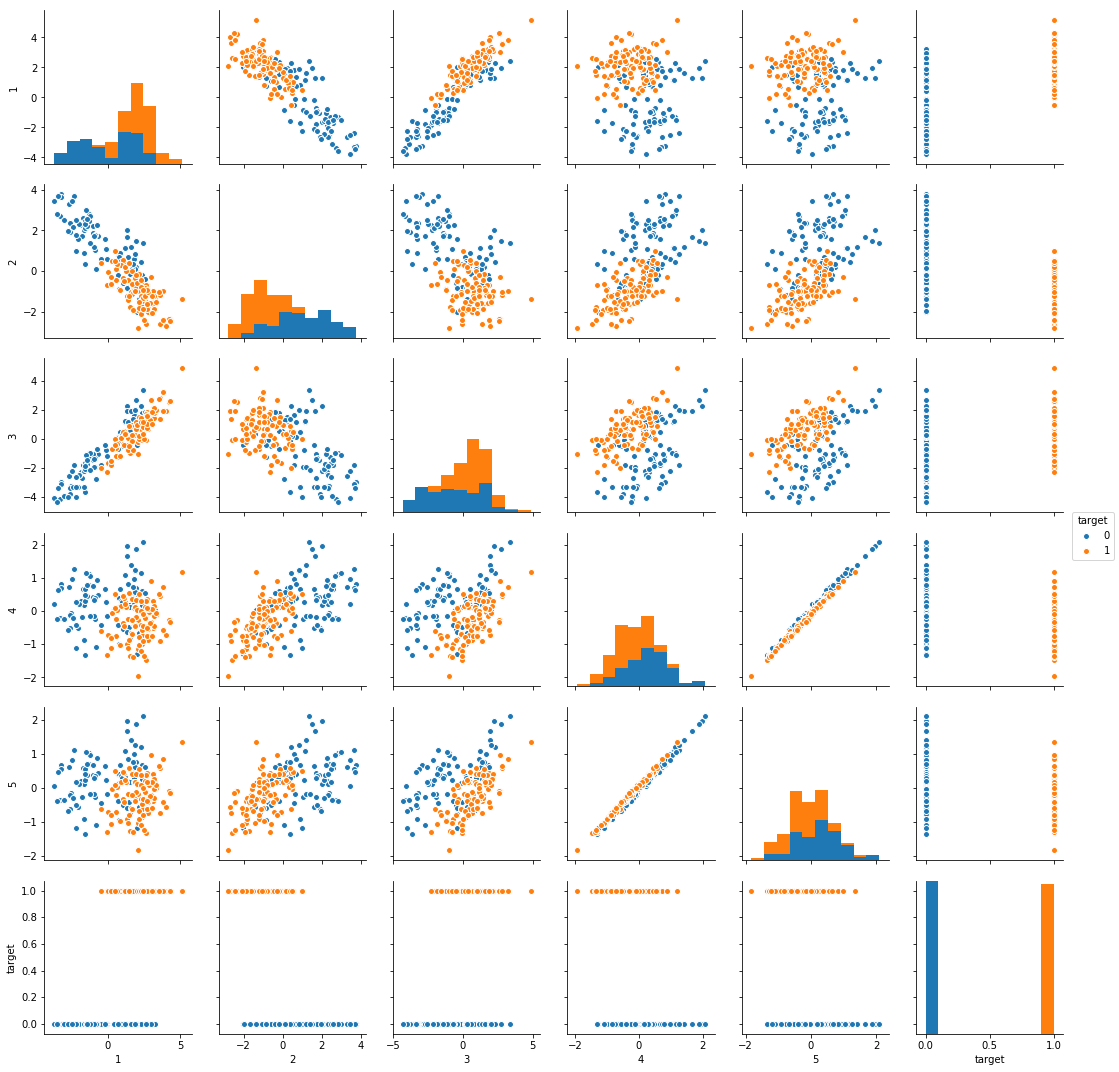

Correlation matrix
               1         2         3         4         5    target
1       1.000000 -0.881056  0.919127 -0.147604 -0.036146  0.595943
2      -0.881056  1.000000 -0.623454  0.597878  0.504550 -0.685641
3       0.919127 -0.623454  1.000000  0.253979  0.360480  0.414002
4      -0.147604  0.597878  0.253979  1.000000  0.993736 -0.423733
5      -0.036146  0.504550  0.360480  0.993736  1.000000 -0.360807
target  0.595943 -0.685641  0.414002 -0.423733 -0.360807  1.000000


In [47]:
restored_PCA_data = PCA_restore(PCA_data, evect_reduced, p1, p2)
visualize_corr(restored_PCA_data, target)

### Image data

In [48]:
from PIL import Image
number_of_components_image = 100

# read image 
img = Image.open('Data/pct.jpg')
# black & white transformation
img = img.convert('L')

# create numpy array
img_X = (np.copy(np.asarray(img))).astype(float)

# normalization
X_norm_img, p1, p2 = normalize(img_X)

# dimension reduction
X_reduced_img, evect_reduced = PCA_transform(X_norm_img, number_of_components_image)

# dimension restoring
X_restored_img = PCA_restore(X_reduced_img, evect_reduced, p1, p2)

# create from restored array
restored_img = Image.fromarray(X_restored_img.astype('uint8'))

img.show()
restored_img.show()

/Users/Yaroslava/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
